**Import modules + libraries**

In [1]:
# Import the relevant modules
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
from math import pi
import trackpy
from iris.time import PartialDateTime
import tobac
import warnings

In [2]:
# Import the libraries
import functions
import dictionaries

In [3]:
# Set up the warning messages
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

**Read in the tracks data (pandas dataframe from Save/Track.h5) + convert to datetime to make it easier to use**

In [4]:
#read in the Track.h5 file to a pandas dataframe
tracks_nmin_118=pd.read_hdf('Save/Jan_1998/n_min_threshold/Track_nmin118.h5','table')
tracks_nmin987=pd.read_hdf('Save/Jan_1998/n_min_threshold/Track_nmin987.h5','table')
tracks_nmin1481=pd.read_hdf('Save/Jan_1998/n_min_threshold/Track_nmin1481.h5','table')
tracks_nmin1550=pd.read_hdf('Save/Jan_1998/n_min_threshold/Track_nmin1550.h5','table')
tracks_nmin1975=pd.read_hdf('Save/Jan_1998/n_min_threshold/Track_nmin1975.h5','table')
tracks_nmin2469=pd.read_hdf('Save/Jan_1998/n_min_threshold/Track_nmin2469.h5','table')

#convert ['timestr'] column to datetime in dataframe
tracks_nmin_118.timestr=tracks_nmin_118.timestr.astype(str)
tracks_nmin_118['datetime'] = pd.to_datetime(tracks_nmin_118.timestr.str.split(',\s*').str[0])
set(tracks_nmin_118['datetime'])

tracks_nmin987.timestr=tracks_nmin987.timestr.astype(str)
tracks_nmin987['datetime'] = pd.to_datetime(tracks_nmin987.timestr.str.split(',\s*').str[0])
set(tracks_nmin987['datetime'])

tracks_nmin1481.timestr=tracks_nmin1481.timestr.astype(str)
tracks_nmin1481['datetime'] = pd.to_datetime(tracks_nmin1481.timestr.str.split(',\s*').str[0])
set(tracks_nmin1481['datetime'])

tracks_nmin1550.timestr=tracks_nmin1550.timestr.astype(str)
tracks_nmin1550['datetime'] = pd.to_datetime(tracks_nmin1550.timestr.str.split(',\s*').str[0])
set(tracks_nmin1550['datetime'])

tracks_nmin1975.timestr=tracks_nmin1975.timestr.astype(str)
tracks_nmin1975['datetime'] = pd.to_datetime(tracks_nmin1975.timestr.str.split(',\s*').str[0])
set(tracks_nmin1975['datetime'])

tracks_nmin2469.timestr=tracks_nmin2469.timestr.astype(str)
tracks_nmin2469['datetime'] = pd.to_datetime(tracks_nmin2469.timestr.str.split(',\s*').str[0])
set(tracks_nmin2469['datetime'])

{Timestamp('1998-01-01 00:30:00'),
 Timestamp('1998-01-01 01:30:00'),
 Timestamp('1998-01-01 02:30:00'),
 Timestamp('1998-01-01 03:30:00'),
 Timestamp('1998-01-01 04:30:00'),
 Timestamp('1998-01-01 05:30:00'),
 Timestamp('1998-01-01 06:30:00'),
 Timestamp('1998-01-01 07:30:00'),
 Timestamp('1998-01-01 08:30:00'),
 Timestamp('1998-01-01 09:30:00'),
 Timestamp('1998-01-01 10:30:00'),
 Timestamp('1998-01-01 11:30:00'),
 Timestamp('1998-01-01 12:30:00'),
 Timestamp('1998-01-01 13:30:00'),
 Timestamp('1998-01-01 14:30:00'),
 Timestamp('1998-01-01 15:30:00'),
 Timestamp('1998-01-01 16:30:00'),
 Timestamp('1998-01-01 17:30:00'),
 Timestamp('1998-01-01 18:30:00'),
 Timestamp('1998-01-01 19:30:00'),
 Timestamp('1998-01-01 20:30:00'),
 Timestamp('1998-01-01 21:30:00'),
 Timestamp('1998-01-01 22:30:00'),
 Timestamp('1998-01-01 23:30:00'),
 Timestamp('1998-01-02 00:30:00'),
 Timestamp('1998-01-02 01:30:00'),
 Timestamp('1998-01-02 02:30:00'),
 Timestamp('1998-01-02 03:30:00'),
 Timestamp('1998-01-

In [5]:
tracks_nmin_118

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,forecast_reference_time,forecast_period,cell,time_cell,datetime
0,0,1,1.797949,477.112874,335,241,1,1998-01-01 00:30:00,1998-01-01 00:30:00,-39.967232,-65.716865,294.283135,294.283135,-1,0 days 00:00:00,1998-01-01 00:30:00
1,0,2,105.068098,544.136803,31869,241,2,1998-01-01 00:30:00,1998-01-01 00:30:00,-35.784794,-63.002395,296.997605,296.997605,2,0 days 00:00:00,1998-01-01 00:30:00
2,0,5,300.147878,505.919844,598,241,3,1998-01-01 00:30:00,1998-01-01 00:30:00,-27.884062,-64.550185,295.449815,295.449815,-1,0 days 00:00:00,1998-01-01 00:30:00
3,0,8,434.772116,747.784927,28891,241,4,1998-01-01 00:30:00,1998-01-01 00:30:00,-22.431780,-54.754651,305.245349,305.245349,-1,0 days 00:00:00,1998-01-01 00:30:00
4,0,11,434.828725,991.614604,139,241,5,1998-01-01 00:30:00,1998-01-01 00:30:00,-22.429487,-44.879560,315.120440,315.120440,-1,0 days 00:00:00,1998-01-01 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50615,743,298,1057.588034,386.693740,233,241,50616,1998-01-31 23:30:00,1998-01-31 23:30:00,2.792264,-69.378858,290.621142,290.621142,-1,30 days 23:00:00,1998-01-31 23:30:00
50616,743,300,1058.632781,510.764880,406,241,50617,1998-01-31 23:30:00,1998-01-31 23:30:00,2.834577,-64.353974,295.646026,295.646026,-1,30 days 23:00:00,1998-01-31 23:30:00
50617,743,304,1089.279537,452.839082,747,241,50618,1998-01-31 23:30:00,1998-01-31 23:30:00,4.075771,-66.699968,293.300032,293.300032,-1,30 days 23:00:00,1998-01-31 23:30:00
50618,743,309,1117.867903,542.581551,387,241,50619,1998-01-31 23:30:00,1998-01-31 23:30:00,5.233599,-63.065408,296.934592,296.934592,-1,30 days 23:00:00,1998-01-31 23:30:00


**Analysis for initiation and dissipation of MCSs**

In [6]:
#225K threshold
init_hours_nmin118 = functions.get_mcs_init(tracks_nmin_118)
init_hours_nmin118 = np.array(init_hours_nmin118)
init_hours_nmin118, bins = np.histogram(init_hours_nmin118, bins = np.arange(0,25))

diss_hours_nmin118 = functions.get_mcs_diss(tracks_nmin_118)
diss_hours_nmin118 = np.array(diss_hours_nmin118)
diss_hours_nmin118, bins = np.histogram(diss_hours_nmin118, bins = np.arange(0,25))

init_nmin118 = init_hours_nmin118/np.nansum(init_hours_nmin118) * 100
diss_nmin118 = diss_hours_nmin118/np.nansum(diss_hours_nmin118) * 100

#230K threshold
init_hours_nmin987 = functions.get_mcs_init(tracks_nmin987)
init_hours_nmin987 = np.array(init_hours_nmin987)
init_hours_nmin987, bins = np.histogram(init_hours_nmin987, bins = np.arange(0,25))

diss_hours_nmin987 = functions.get_mcs_diss(tracks_nmin987)
diss_hours_nmin987 = np.array(diss_hours_nmin987)
diss_hours_nmin987, bins = np.histogram(diss_hours_nmin987, bins = np.arange(0,25))

init_nmin987 = init_hours_nmin987/np.nansum(init_hours_nmin987) * 100
diss_nmin987 = diss_hours_nmin987/np.nansum(diss_hours_nmin987) * 100

#235K threshold
init_hours_nmin1481 = functions.get_mcs_init(tracks_nmin1481)
init_hours_nmin1481 = np.array(init_hours_nmin1481)
init_hours_nmin1481, bins = np.histogram(init_hours_nmin1481, bins = np.arange(0,25))

diss_hours_nmin1481 = functions.get_mcs_diss(tracks_nmin1481)
diss_hours_nmin1481 = np.array(diss_hours_nmin1481)
diss_hours_nmin1481, bins = np.histogram(diss_hours_nmin1481, bins = np.arange(0,25))

init_nmin1481 = init_hours_nmin1481/np.nansum(init_hours_nmin1481) * 100
diss_nmin1481 = diss_hours_nmin1481/np.nansum(diss_hours_nmin1481) * 100

#240K threshold
init_hours_nmin1550 = functions.get_mcs_init(tracks_nmin1550)
init_hours_nmin1550 = np.array(init_hours_nmin1550)
init_hours_nmin1550, bins = np.histogram(init_hours_nmin1550, bins = np.arange(0,25))

diss_hours_nmin1550 = functions.get_mcs_diss(tracks_nmin1550)
diss_hours_nmin1550 = np.array(diss_hours_nmin1550)
diss_hours_nmin1550, bins = np.histogram(diss_hours_nmin1550, bins = np.arange(0,25))

init_nmin1550 = init_hours_nmin1550/np.nansum(init_hours_nmin1550) * 100
diss_nmin1550 = diss_hours_nmin1550/np.nansum(diss_hours_nmin1550) * 100

#241K threshold
init_hours_nmin1975 = functions.get_mcs_init(tracks_nmin1975)
init_hours_nmin1975 = np.array(init_hours_nmin1975)
init_hours_nmin1975, bins = np.histogram(init_hours_nmin1975, bins = np.arange(0,25))

diss_hours_nmin1975 = functions.get_mcs_diss(tracks_nmin1975)
diss_hours_nmin1975 = np.array(diss_hours_nmin1975)
diss_hours_nmin1975, bins = np.histogram(diss_hours_nmin1975, bins = np.arange(0,25))

init_nmin1975 = init_hours_nmin1975/np.nansum(init_hours_nmin1975) * 100
diss_nmin1975 = diss_hours_nmin1975/np.nansum(diss_hours_nmin1975) * 100

#245K threshold
init_hours_nmin2469 = functions.get_mcs_init(tracks_nmin2469)
init_hours_nmin2469 = np.array(init_hours_nmin2469)
init_hours_nmin2469, bins = np.histogram(init_hours_nmin2469, bins = np.arange(0,25))

diss_hours_nmin2469 = functions.get_mcs_diss(tracks_nmin2469)
diss_hours_nmin2469 = np.array(diss_hours_nmin2469)
diss_hours_nmin2469, bins = np.histogram(diss_hours_nmin2469, bins = np.arange(0,25))

init_nmin2469 = init_hours_nmin2469/np.nansum(init_hours_nmin2469) * 100
diss_nmin2469 = diss_hours_nmin2469/np.nansum(diss_hours_nmin2469) * 100


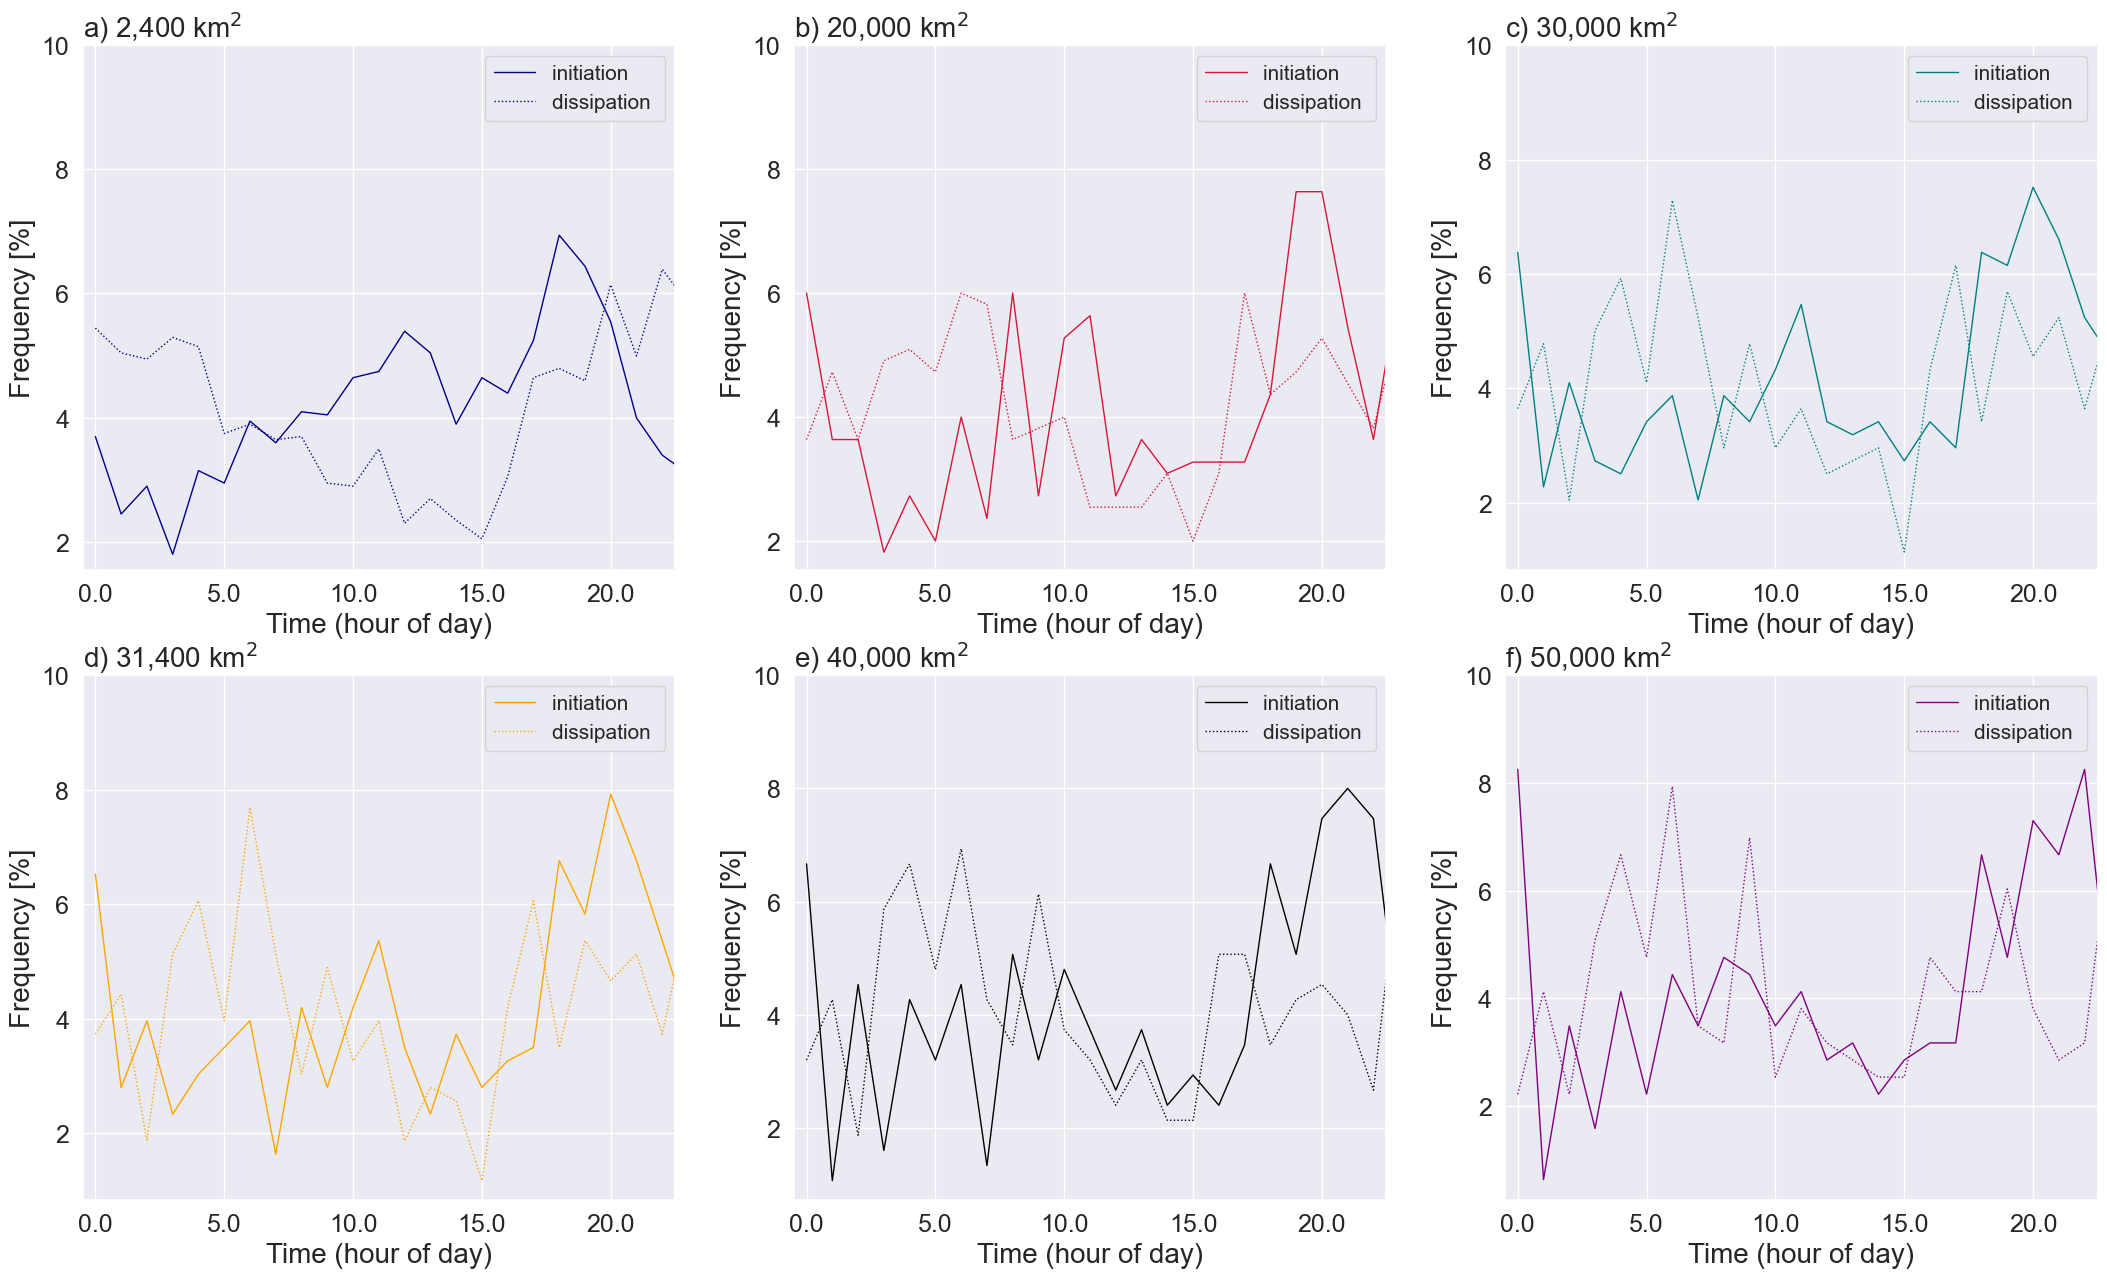

In [7]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set()

plt.figure(figsize=(26,15))
f= 20
lf= 15

ax1 = plt.subplot(2, 3, 1) 
ax1.set_title('a) 2,400 km$^{2}$ ', loc='left', fontsize= f )
ax1.plot(np.arange(0,24), init_nmin118, label = 'initiation ', color= 'darkblue', linewidth = 1)
ax1.plot(np.arange(0,24), diss_nmin118, label = 'dissipation ', color= 'darkblue', linewidth = 1, linestyle = 'dotted')
ax1.legend(fontsize=lf)
ax1.set_yticks(np.arange(2,12,2))
ax1.set_yticklabels(ax1.get_yticks(),fontsize=18)
ax1.set_xticklabels(ax1.get_xticks(),fontsize=18)
ax1.set_xlim(-0.5,22.5)
ax1.set_xlabel('Time (hour of day)', fontsize= f)
ax1.set_ylabel('Frequency [%]', fontsize= f)

ax2 = plt.subplot(2, 3, 2) 
ax2.set_title('b) 20,000 km$^{2}$ ', loc='left', fontsize= f )
ax2.plot(np.arange(0,24), init_nmin987, label = 'initiation ', color= 'crimson', linewidth = 1)
ax2.plot(np.arange(0,24), diss_nmin987, label = 'dissipation ', color= 'crimson', linewidth = 1, linestyle = 'dotted')
ax2.legend(fontsize=lf)
ax2.set_yticks(np.arange(2,12,2))
ax2.set_xlim(-0.5,22.5)
ax2.set_yticklabels(ax2.get_yticks(),fontsize=18)
ax2.set_xticklabels(ax2.get_xticks(),fontsize=18)
ax2.set_xlabel('Time (hour of day)', fontsize= f)
ax2.set_ylabel('Frequency [%]', fontsize= f)

ax3 = plt.subplot(2, 3, 3) 
ax3.set_title('c) 30,000 km$^{2}$ ', loc='left', fontsize= f )
ax3.plot(np.arange(0,24), init_nmin1481, label = 'initiation ', color= 'teal', linewidth = 1)
ax3.plot(np.arange(0,24), diss_nmin1481, label = 'dissipation ', color= 'teal', linewidth = 1, linestyle = 'dotted')
ax3.legend(fontsize=lf)
ax3.set_yticks(np.arange(2,12,2))
ax3.set_yticklabels(ax3.get_yticks(),fontsize=18)
ax3.set_xticklabels(ax3.get_xticks(),fontsize=18)
ax3.set_xlim(-0.5,22.5)
ax3.set_xlabel('Time (hour of day)', fontsize= f)
ax3.set_ylabel('Frequency [%]', fontsize= f)

ax4 = plt.subplot(2, 3, 4) 
ax4.set_title('d) 31,400 km$^{2}$ ', loc='left', fontsize= f )
ax4.plot(np.arange(0,24), init_nmin1550, label = 'initiation ', color= 'orange', linewidth = 1)
ax4.plot(np.arange(0,24), diss_nmin1550, label = 'dissipation ', color= 'orange', linewidth = 1, linestyle = 'dotted')
ax4.legend(fontsize=lf)
ax4.set_yticks(np.arange(2,12,2))
ax4.set_yticklabels(ax4.get_yticks(),fontsize=18)
ax4.set_xticklabels(ax4.get_xticks(),fontsize=18)
ax4.set_xlim(-0.5,22.5)
ax4.set_xlabel('Time (hour of day)', fontsize= f)
ax4.set_ylabel('Frequency [%]', fontsize= f)

ax5 = plt.subplot(2, 3, 5) 
ax5.set_title('e) 40,000 km$^{2}$ ', loc='left', fontsize= f )
ax5.plot(np.arange(0,24), init_nmin1975, label = 'initiation ', color= 'black', linewidth = 1)
ax5.plot(np.arange(0,24), diss_nmin1975, label = 'dissipation ', color= 'black', linewidth = 1, linestyle = 'dotted')
ax5.legend(fontsize=lf)
ax5.set_yticks(np.arange(2,12,2))
ax5.set_yticklabels(ax5.get_yticks(),fontsize=18)
ax5.set_xticklabels(ax5.get_xticks(),fontsize=18)
ax5.set_xlim(-0.5,22.5)
ax5.set_xlabel('Time (hour of day)', fontsize= f)
ax5.set_ylabel('Frequency [%]', fontsize= f)

ax6 = plt.subplot(2, 3, 6) 
ax6.set_title('f) 50,000 km$^{2}$ ', loc='left', fontsize= f )
ax6.plot(np.arange(0,24), init_nmin2469, label = 'initiation ', color= 'purple', linewidth = 1)
ax6.plot(np.arange(0,24), diss_nmin2469, label = 'dissipation ', color= 'purple', linewidth = 1, linestyle = 'dotted')
ax6.legend(fontsize=lf)
ax6.set_yticks(np.arange(2,12,2))
ax6.set_yticklabels(ax6.get_yticks(),fontsize=18)
ax6.set_xticklabels(ax6.get_xticks(),fontsize=18)
ax6.set_xlim(-0.5,22.5)
ax6.set_xlabel('Time (hour of day)', fontsize= f)
ax6.set_ylabel('Frequency [%]', fontsize= f)

plt.savefig('Plot/nminthreshold/Init_diss_nminthresholds.png')



In [8]:
init_lats_nmin118, init_lons_nmin118, diss_lats_nmin118, diss_lons_nmin118 = functions.get_init(tracks_nmin_118)
init_lats_nmin987, init_lons_nmin987, diss_lats_nmin987, diss_lons_nmin987 = functions.get_init(tracks_nmin987)
init_lats_nmin1481, init_lons_nmin1481, diss_lats_nmin1481, diss_lons_nmin1481 = functions.get_init(tracks_nmin1481)
init_lats_nmin1550, init_lons_nmin1550, diss_lats_nmin1550, diss_lons_nmin1550 = functions.get_init(tracks_nmin1550)
init_lats_nmin1975, init_lons_nmin1975, diss_lats_nmin1975, diss_lons_nmin1975 = functions.get_init(tracks_nmin1975)
init_lats_nmin2469, init_lons_nmin2469, diss_lats_nmin2469, diss_lons_nmin2469 = functions.get_init(tracks_nmin2469)




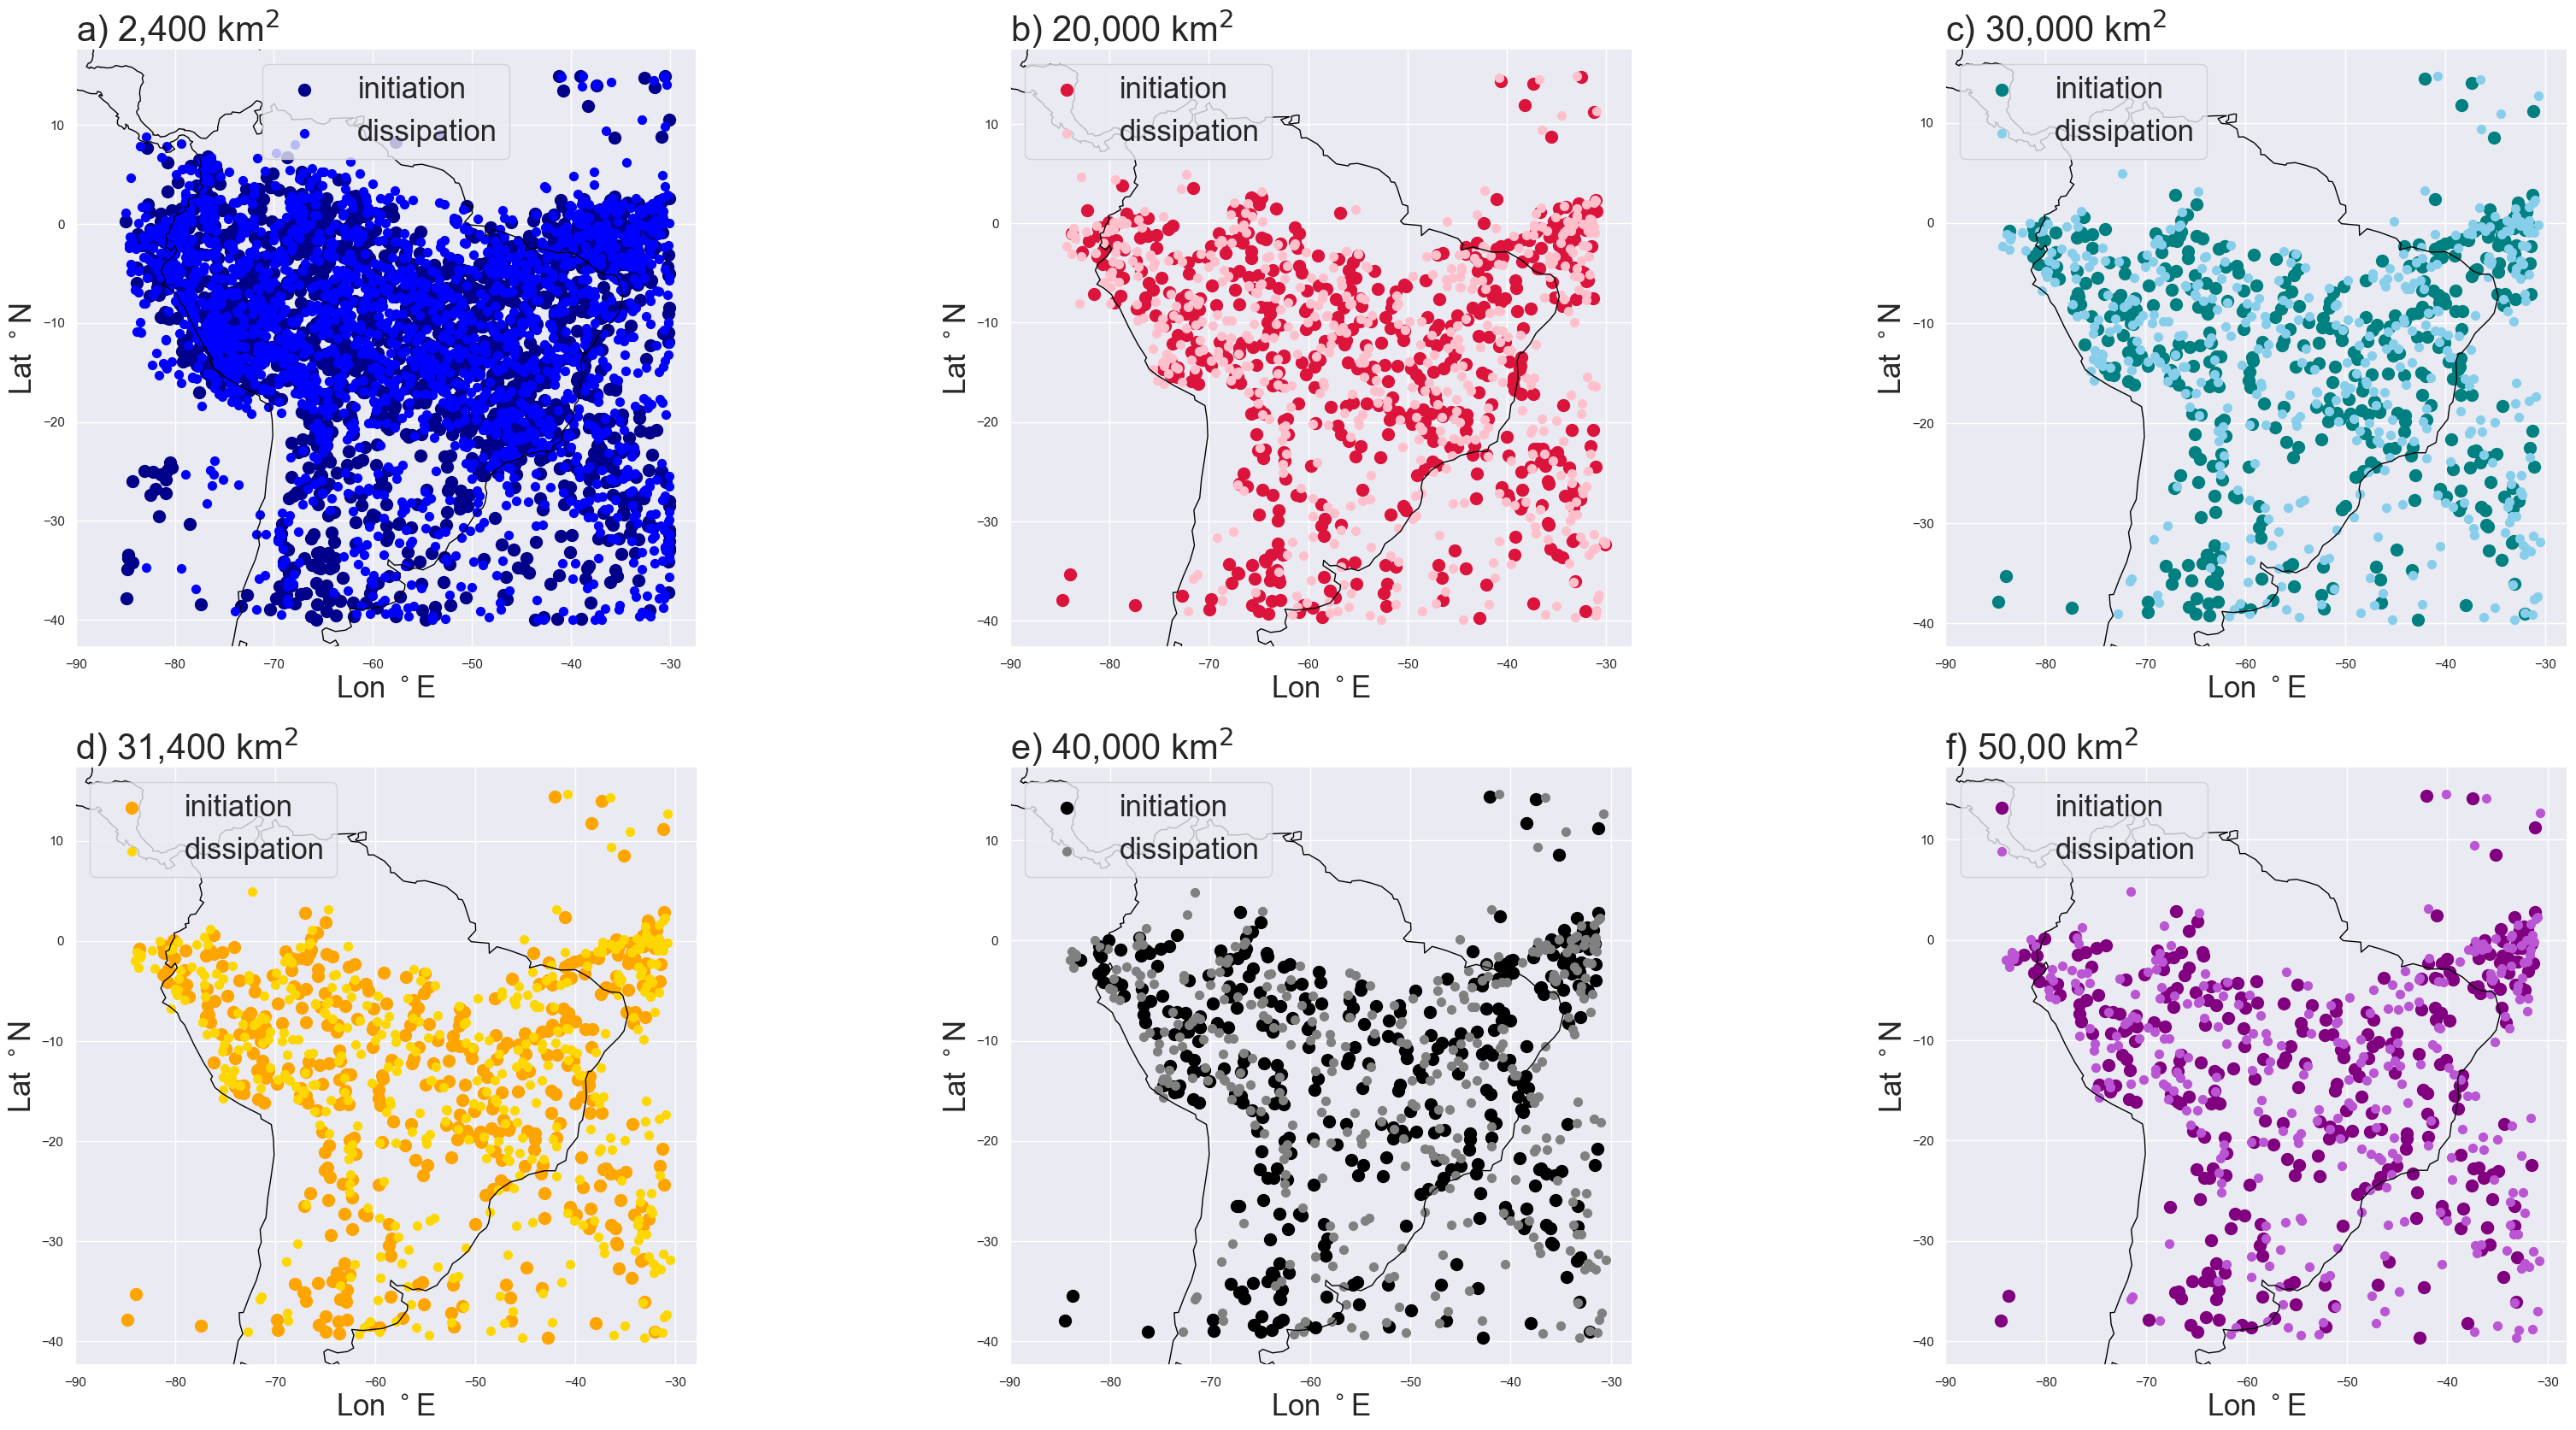

In [9]:
import cartopy.crs as ccrs

plt.figure(figsize=(40,20))
xlabels=[-90,-70,-50,-30]
ylabels= [-40,-30,-20,-10,0,10]
# markersize 
s = 100
f= 30
lf= 15


# Locations of initiation and dissipation of MCSs 
ax1 = plt.subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.set_title('a) 2,400 km$^{2}$ ', loc='left', fontsize= f )
ax1.scatter(init_lons_nmin118, init_lats_nmin118,  color='darkblue',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax1.scatter(diss_lons_nmin118, diss_lats_nmin118,  color='blue',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax1.coastlines()
ax1.legend(fontsize= 25)
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=25)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=25)

ax2 = plt.subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.set_title('b) 20,000 km$^{2}$ ', loc='left', fontsize= f )
ax2.scatter(init_lons_nmin987, init_lats_nmin987,  color='crimson',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax2.scatter(diss_lons_nmin987, diss_lats_nmin987,  color='pink',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax2.coastlines()
ax2.legend(fontsize= 25)
ax2.set_xticks(xlabels, xlabels)
ax2.set_yticks(ylabels,ylabels)
ax2.set_xlabel('Lon $^\circ$E',  fontsize=25)
ax2.set_ylabel('Lat $^\circ$N',  fontsize=25)

ax3 = plt.subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.set_title('c) 30,000 km$^{2}$ ', loc='left', fontsize= f )
ax3.scatter(init_lons_nmin1481, init_lats_nmin1481,  color='teal',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax3.scatter(diss_lons_nmin1481, diss_lats_nmin1481,  color='skyblue',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax3.coastlines()
ax3.legend(fontsize= 25)
ax3.set_xticks(xlabels, xlabels)
ax3.set_yticks(ylabels,ylabels)
ax3.set_xlabel('Lon $^\circ$E',  fontsize=25)
ax3.set_ylabel('Lat $^\circ$N',  fontsize=25)

ax4 = plt.subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.set_title('d) 31,400 km$^{2}$ ', loc='left', fontsize= f )
ax4.scatter(init_lons_nmin1550, init_lats_nmin1550,  color='orange',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax4.scatter(diss_lons_nmin1550, diss_lats_nmin1550,  color='gold',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax4.coastlines()
ax4.legend(fontsize= 25)
ax4.set_xticks(xlabels, xlabels)
ax4.set_yticks(ylabels,ylabels)
ax4.set_xlabel('Lon $^\circ$E',  fontsize=25)
ax4.set_ylabel('Lat $^\circ$N',  fontsize=25)

ax5 = plt.subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.set_title('e) 40,000 km$^{2}$ ', loc='left', fontsize= f )
ax5.scatter(init_lons_nmin1975, init_lats_nmin1975,  color='black',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax5.scatter(diss_lons_nmin1975, diss_lats_nmin1975,  color='grey',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax5.coastlines()
ax5.legend(fontsize= 25)
ax5.set_xticks(xlabels, xlabels)
ax5.set_yticks(ylabels,ylabels)
ax5.set_xlabel('Lon $^\circ$E',  fontsize=25)
ax5.set_ylabel('Lat $^\circ$N',  fontsize=25)

ax6 = plt.subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.set_title('f) 50,00 km$^{2}$ ', loc='left', fontsize= f )
ax6.scatter(init_lons_nmin2469, init_lats_nmin2469,  color='purple',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax6.scatter(diss_lons_nmin2469, diss_lats_nmin2469,  color='mediumorchid',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax6.coastlines()
ax6.legend(fontsize= 25)
ax6.set_xticks(xlabels, xlabels)
ax6.set_yticks(ylabels,ylabels)
ax6.set_xlabel('Lon $^\circ$E',  fontsize=25)
ax6.set_ylabel('Lat $^\circ$N',  fontsize=25)

plt.savefig('Plot/nminthreshold/Init_diss_loc_nminthresholds.png')


**MCS area analysis (converts from grid points to area (km2) within function)**

In [10]:
area_nmin118=functions.get_area(tracks_nmin_118)
area_nmin987=functions.get_area(tracks_nmin987)
area_nmin1481=functions.get_area(tracks_nmin1481)
area_nmin1550=functions.get_area(tracks_nmin1550)
area_nmin1975=functions.get_area(tracks_nmin1975)
area_nmin2469=functions.get_area(tracks_nmin2469)


array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.


In [11]:
print(area_nmin118)

[ 25576.72173389 323591.203125    16411.5        ...   7058.57142857
  38830.82142857  12699.64285714]


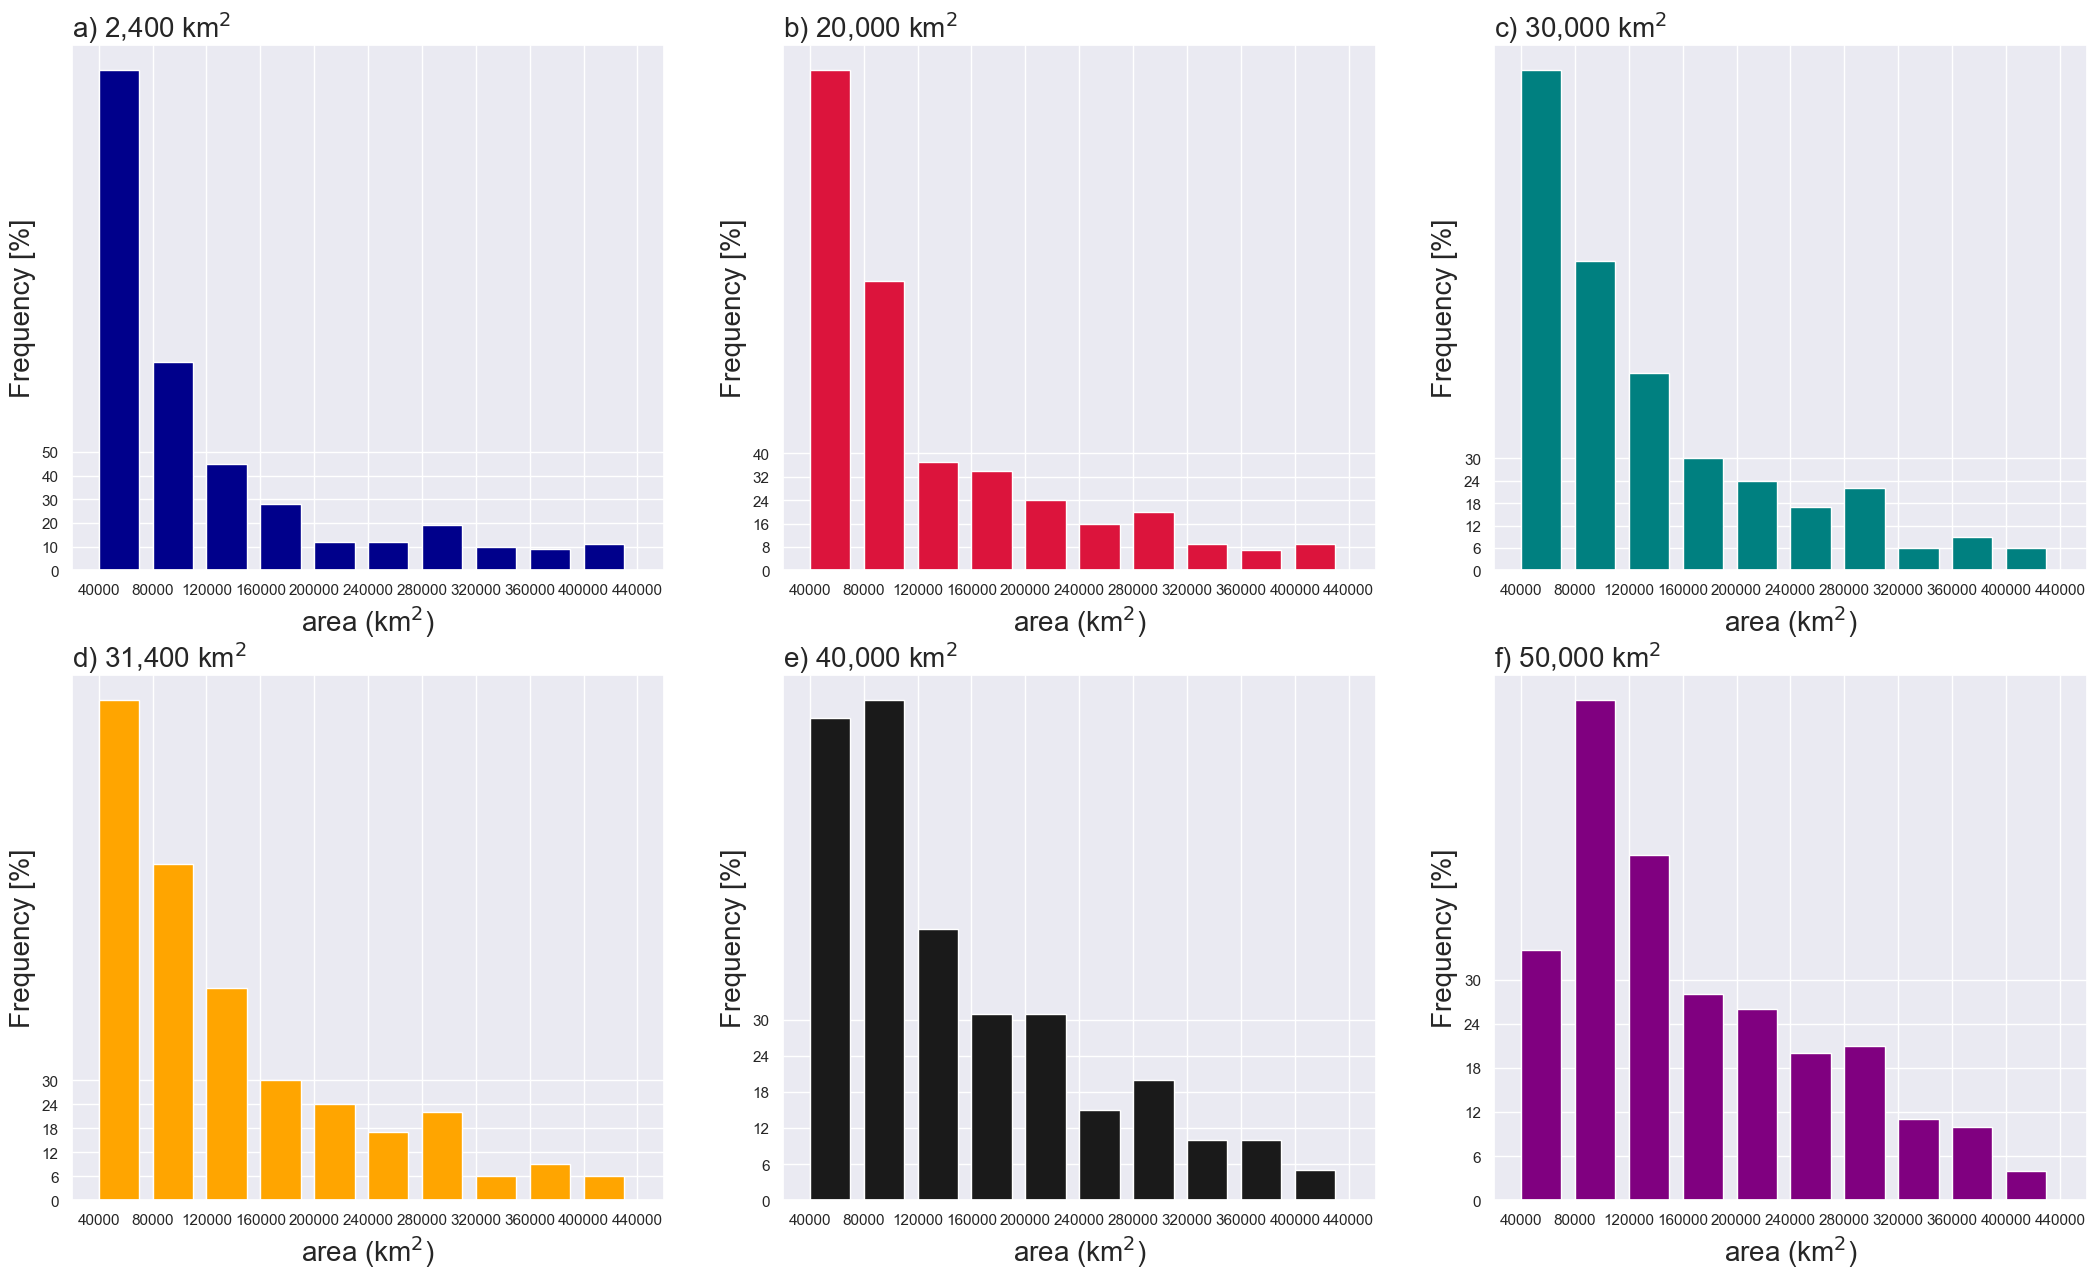

In [12]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set()

plt.figure(figsize=(26,15))
f= 20
lf= 15

ax1=plt.subplot(2,3,1)
ax1.set_title('a) 2,400 km$^{2}$ ', loc='left', fontsize= f )
ax1.hist(area_nmin118,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'darkblue')
ax1.set_xlabel('area (km$^{2}$)', fontsize= 20)
ax1.set_xticks([40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],fontsize=18)
ax1.set_yticks(np.linspace(0,50,6),fontsize=18)
ax1.set_ylabel('Frequency [%]',fontsize=f)

ax2=plt.subplot(2,3,2)
ax2.set_title('b) 20,000 km$^{2}$ ', loc='left', fontsize= f )
ax2.hist(area_nmin987,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'crimson')
ax2.set_xlabel('area (km$^{2}$)', fontsize= 20)
ax2.set_xticks([40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],fontsize=18)
ax2.set_yticks(np.linspace(0,40,6),fontsize=18)
ax2.set_ylabel('Frequency [%]',fontsize=f)

ax3=plt.subplot(2,3,3)
ax3.set_title('c) 30,000 km$^{2}$ ', loc='left', fontsize= f )
ax3.hist(area_nmin1481,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'teal')
ax3.set_xlabel('area (km$^{2}$)', fontsize= 20)
ax3.set_xticks([40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],fontsize=18)
ax3.set_yticks(np.linspace(0,30,6),fontsize=18)
ax3.set_ylabel('Frequency [%]',fontsize=f)

ax4=plt.subplot(2,3,4)
ax4.set_title('d) 31,400 km$^{2}$ ', loc='left', fontsize= f )
ax4.hist(area_nmin1550,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'orange')
ax4.set_xlabel('area (km$^{2}$)', fontsize= 20)
ax4.set_xticks([40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],fontsize=18)
ax4.set_yticks(np.linspace(0,30,6),fontsize=18)
ax4.set_ylabel('Frequency [%]',fontsize=f)

ax5=plt.subplot(2,3,5)
ax5.set_title('e) 40,000 km$^{2}$ ', loc='left', fontsize= f )
ax5.hist(area_nmin1975,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'k')
ax5.set_xlabel('area (km$^{2}$)', fontsize= 20)
ax5.set_xticks([40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],fontsize=18)
ax5.set_yticks(np.linspace(0,30,6),fontsize=18)
ax5.set_ylabel('Frequency [%]',fontsize=f)

ax6=plt.subplot(2,3,6)
ax6.set_title('f) 50,000 km$^{2}$ ', loc='left', fontsize= f )
ax6.hist(area_nmin2469,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=30000,color= 'purple')
ax6.set_xlabel('area (km$^{2}$)', fontsize= 20)
ax6.set_xticks([40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],fontsize=18)
ax6.set_yticks(np.linspace(0,30,6),fontsize=18)
ax6.set_ylabel('Frequency [%]',fontsize=f)

plt.savefig('Plot/nminthreshold/area_hist_nminthresholds.png')


**Analysis of MCS velocity/propagation speed**

In [13]:
#first need to run the tobac calculate velocity function before running my own function to create the histogram
vel_nmin118= tobac.calculate_velocity(tracks_nmin_118, method_distance=None)
vel_nmin987= tobac.calculate_velocity(tracks_nmin987, method_distance=None)
vel_nmin1481= tobac.calculate_velocity(tracks_nmin1481, method_distance=None)
vel_nmin1550= tobac.calculate_velocity(tracks_nmin1550, method_distance=None)
vel_nmin1975= tobac.calculate_velocity(tracks_nmin1975, method_distance=None)
vel_nmin2469= tobac.calculate_velocity(tracks_nmin2469, method_distance=None)

In [14]:
velocity_nmin118=functions.get_v(vel_nmin118)
velocity_nmin987=functions.get_v(vel_nmin987)
velocity_nmin1481=functions.get_v(vel_nmin1481)
velocity_nmin1550=functions.get_v(vel_nmin1550)
velocity_nmin1975=functions.get_v(vel_nmin1975)
velocity_nmin2469=functions.get_v(vel_nmin2469)

propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.


In [15]:
print(velocity_nmin118)

[        inf 22.34942633 11.22580569 ... 14.65196264 22.53268586
  6.17312551]


In [16]:
import numpy as np

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins))
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

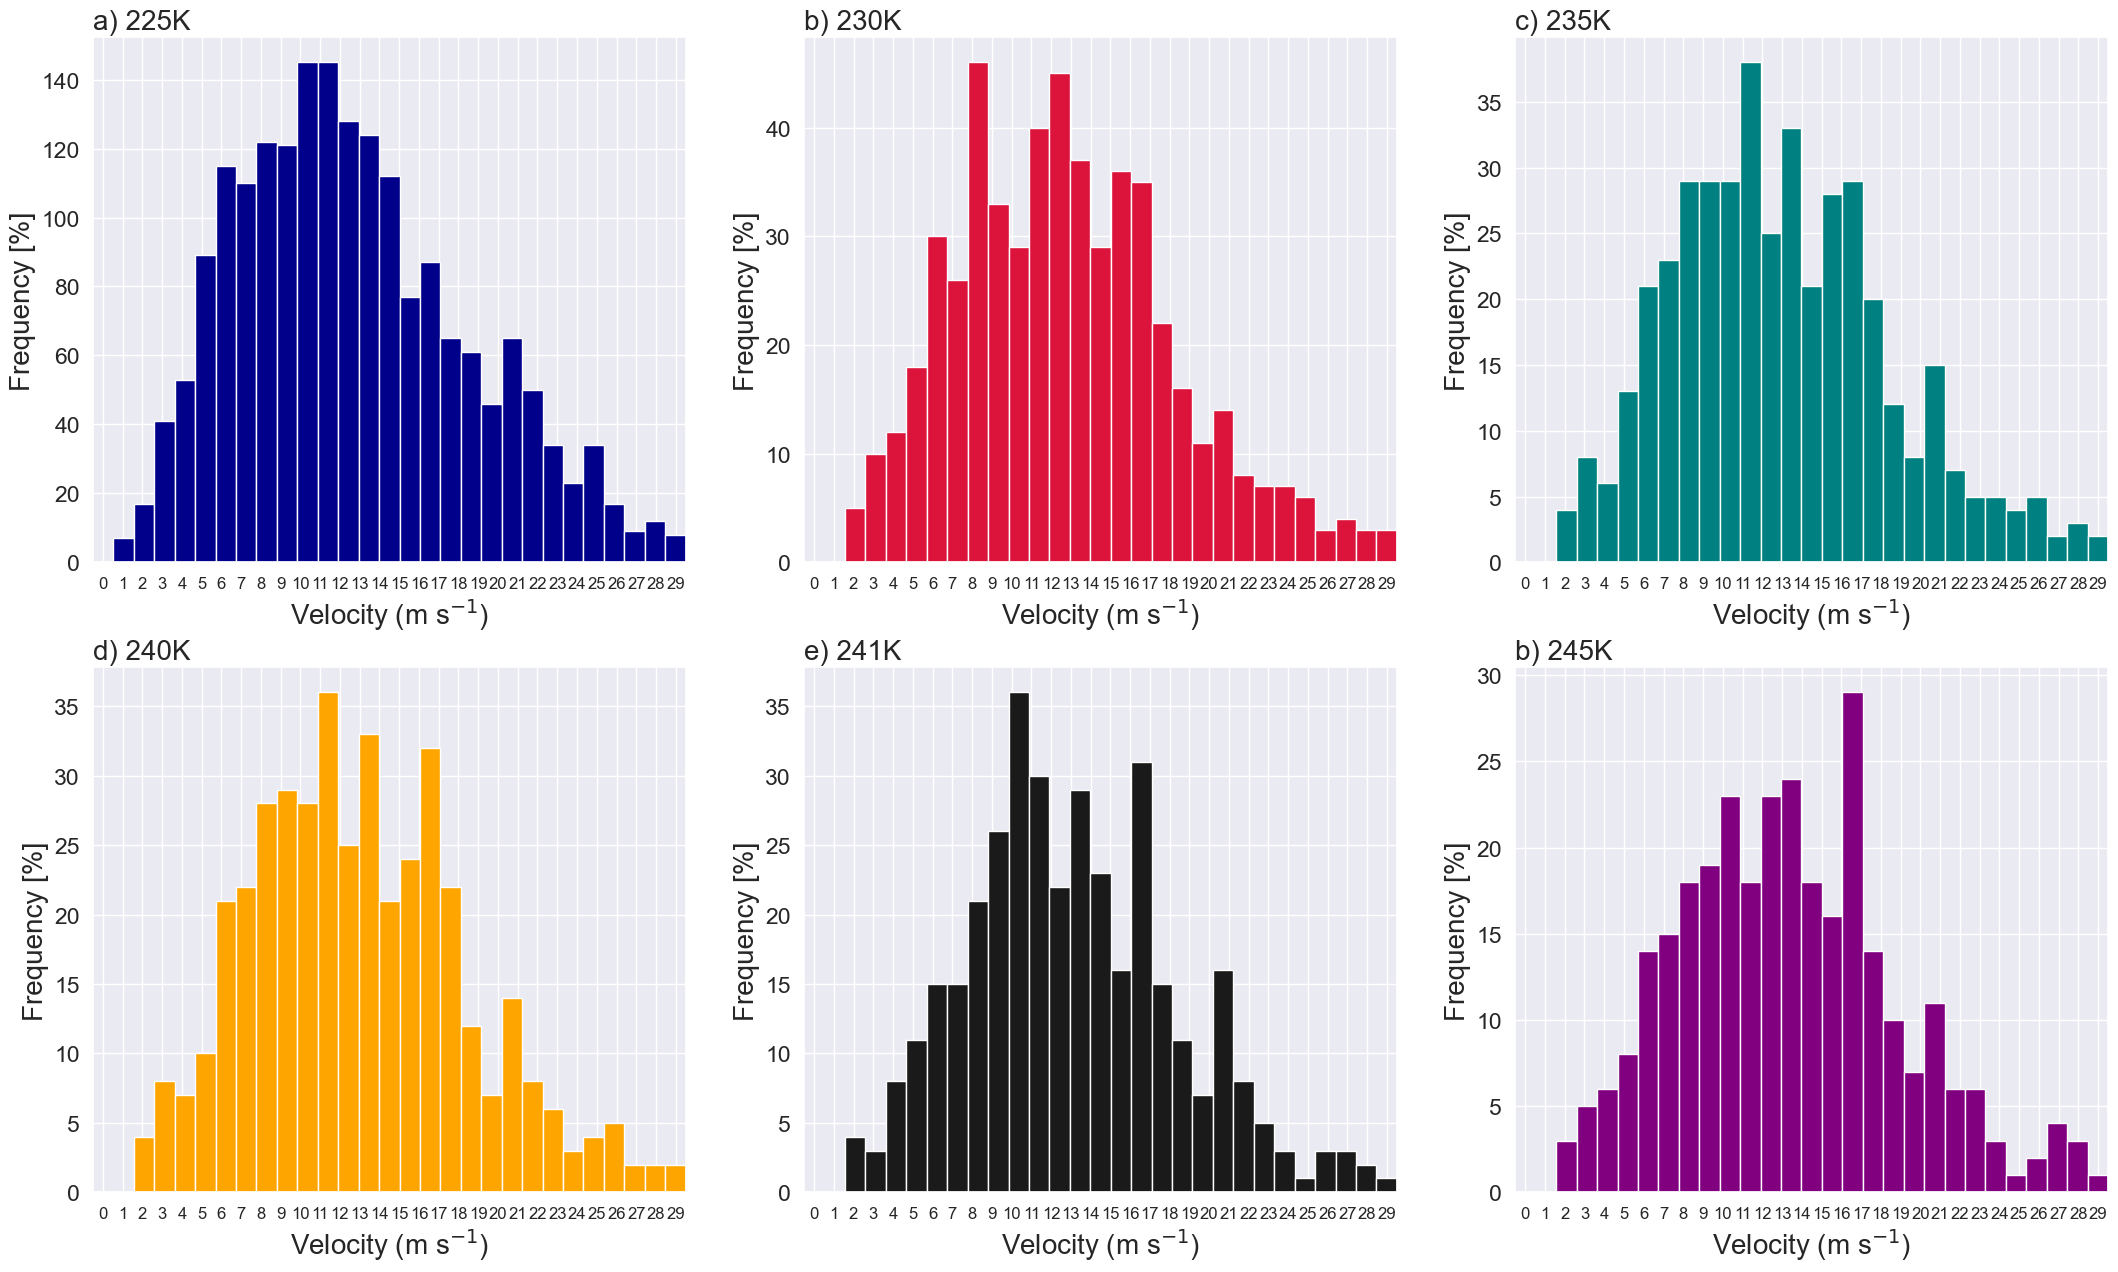

In [17]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set(font_scale=1.5)

plt.figure(figsize=(26,15))
f= 20
lf= 15

ax1 = plt.subplot(2,3,1)
ax1.set_title('a) 225K ', loc='left', fontsize= f)
bins = range(30)
ax1.hist(velocity_nmin118, bins=bins,align='mid',color='darkblue')
ax1.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax1.set_ylabel('Frequency [%]',fontsize=f)
bins_labels(bins,fontsize=12)

ax2= plt.subplot(2,3,2)
ax2.set_title('b) 230K ', loc='left', fontsize= f)
bins = range(30)
ax2.hist(velocity_nmin987, bins=bins,align='mid',color='crimson')
ax2.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax2.set_ylabel('Frequency [%]',fontsize=f)
bins_labels(bins,fontsize=12)

ax3= plt.subplot(2,3,3)
ax3.set_title('c) 235K ', loc='left', fontsize= f)
bins = range(30)
ax3.hist(velocity_nmin1481, bins=bins,align='mid',color='teal')
ax3.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax3.set_ylabel('Frequency [%]',fontsize=f)
bins_labels(bins,fontsize=12)

ax4= plt.subplot(2,3,4)
ax4.set_title('d) 240K ', loc='left', fontsize= f)
bins = range(30)
ax4.hist(velocity_nmin1550, bins=bins,align='mid',color='orange')
ax4.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax4.set_ylabel('Frequency [%]',fontsize=f)
bins_labels(bins,fontsize=12)

ax5= plt.subplot(2,3,5)
ax5.set_title('e) 241K ', loc='left', fontsize= f)
bins = range(30)
ax5.hist(velocity_nmin1975, bins=bins,align='mid',color='k')
ax5.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax5.set_ylabel('Frequency [%]',fontsize=f)
bins_labels(bins,fontsize=12)

ax6= plt.subplot(2,3,6)
ax6.set_title('b) 245K ', loc='left', fontsize= f)
bins = range(30)
ax6.hist(velocity_nmin2469, bins=bins,align='mid',color='purple')
ax6.set_xlabel('Velocity (m s$^{-1}$)',fontsize=f)
ax6.set_ylabel('Frequency [%]',fontsize=f)
bins_labels(bins,fontsize=12)

plt.savefig('Plot/nminthreshold/vel_hist_nminthresholds.png')

